<a href="https://colab.research.google.com/github/JeanMusenga/PhD-Thesis_2024_Musenga/blob/main/Classifiers_with_TF_IDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#What is the difference between Word2Vec and TF-IDF vectorizer?
Word2Vec vs. BoW and TF-IDF: Word2Vec is a neural network-based technique that learns continuous word embeddings, capturing the semantic relationships between words

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import nltk
import gensim
from spacy.tokenizer import Tokenizer
from sklearn.model_selection import train_test_split

In [2]:
np.random.seed(42) #The random seed helps in the reproduction of the results

In [3]:
dataset=pd.read_excel('posts.xlsx')

In [4]:
dataset.shape

(9980, 2)

In [5]:
dataset.head()

,Question_body,Label
0,Here's the architecture:\n<ol>\n<li>Input comp...,1
1,I am confused about the architecture of Razor ...,1
2,I have some spring boot microservices and I wa...,1
3,I'm trying to properly design an application a...,1
4,I heard that for .NET8 Microsoft gifted us wit...,1


# Tokenization

In [6]:
import spacy
nlp = spacy.load("en_core_web_sm")
stop_words = nlp.Defaults.stop_words
print(stop_words)
print("-----------------------------------------------")

import string
punctuations = string.punctuation
print(punctuations)

{'forty', 'n’t', 'thence', 'will', 'well', 'both', 'sometime', 'towards', 'unless', 'although', 'amount', 'per', 'or', 'was', 'under', 'whatever', 'would', 'becoming', 'above', 'ours', 'make', 'ca', 'keep', 'through', 'namely', 'thereafter', 'their', 'empty', 'once', 'this', 'had', 'she', 'see', 'either', 'into', 'whereas', 'up', 'enough', 'anyone', 'seems', 'that', 'least', '‘s', 'whence', 'toward', 'anywhere', 'if', 'here', 'take', 'please', 'together', 'by', 'noone', 'already', 'seemed', 'also', 'other', 'call', 'thereby', 'except', 'elsewhere', 'often', 'below', 'the', "'s", 'else', 'me', 'who', 'he', 'your', 'herein', 'mostly', 'which', 'more', 'somewhere', 'hereupon', 'less', 'our', 'anyhow', 'four', 'go', '‘ve', 'always', 'on', 'just', 'moreover', 'n‘t', 'an', 'then', 'therefore', 'my', 'latterly', '‘ll', 'between', 'ten', 'besides', 'some', 'hence', 'get', 'too', 'while', 'how', 'when', 'quite', 'its', 'same', 'really', 'doing', 'alone', 'nothing', 're', 'third', 'there', 'name

In [7]:
# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    doc = nlp(sentence)
    #print(doc)
    # print(type(doc))

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() for word in doc ]

    # print(mytokens)

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

In [8]:
dataset['Tokens'] = dataset['Question_body'].apply(spacy_tokenizer)

In [9]:
# Save the updated DataFrame to an Excel file
dataset.to_excel('posts.xlsx', index=False)

In [10]:
dataset.head()

,Question_body,Label,Tokens
0,Here's the architecture:\n<ol>\n<li>Input comp...,1,"[architecture, ol, li, input, component, recei..."
1,I am confused about the architecture of Razor ...,1,"[confused, architecture, razor, pages, asp.net..."
2,I have some spring boot microservices and I wa...,1,"[spring, boot, microservice, want, use, micros..."
3,I'm trying to properly design an application a...,1,"[try, properly, design, application, accord, c..."
4,I heard that for .NET8 Microsoft gifted us wit...,1,"[hear, .net8, microsoft, gift, totally, quot;f..."


In [11]:
x = dataset['Tokens'].map(' '.join)
y = dataset['Label']

In [12]:
#dataset.head()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x , y, test_size=0.2, random_state=125)

# Features Engineering with TF-IDF

In [14]:
# I consider words that appear more than once, so I set the parameter min_df=2
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vector = TfidfVectorizer(min_df=2).fit(X_train)
X_train_vect_tf_idf = tf_idf_vector.transform(X_train).toarray()
X_test_vect_tf_idf = tf_idf_vector.transform(X_test).toarray()

# Naive Bayes -- TFIDF

In [15]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

In [16]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train_vect_tf_idf, y_train)

In [17]:
# Predict on the test set
y_pred = nb_model.predict(X_test_vect_tf_idf)

from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

# Compute metrics for each class
precision_class, recall_class, f1_class, support_class = precision_recall_fscore_support(y_test, y_pred, average=None, labels=[0, 1])

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Extract TP, TN, FP, FN for each class
TP_0 = conf_matrix[0, 0]
FN_0 = conf_matrix[0, 1]
FP_0 = conf_matrix[1, 0]
TN_0 = conf_matrix[1, 1]

TP_1 = conf_matrix[1, 1]
FN_1 = conf_matrix[1, 0]
FP_1 = conf_matrix[0, 1]
TN_1 = conf_matrix[0, 0]

# Calculate overall accuracy
accuracy = (TP_0 + TP_1) / (TP_0 + TP_1 + FP_0 + FP_1 + FN_0 + FN_1)

print(f'Overall Accuracy: {accuracy}')
print(f'Class 0 - Precision: {precision_class[0]}, Recall: {recall_class[0]}, F1-score: {f1_class[0]}, Support: {support_class[0]}')
print(f'Class 1 - Precision: {precision_class[1]}, Recall: {recall_class[1]}, F1-score: {f1_class[1]}, Support: {support_class[1]}')

Overall Accuracy: 0.708904109589041
Class 0 - Precision: 0.8590398365679265, Recall: 0.8063279002876318, F1-score: 0.8318496538081108, Support: 1043
Class 1 - Precision: 0.8013765978367748, Recall: 0.8551941238195173, F1-score: 0.8274111675126904, Support: 953


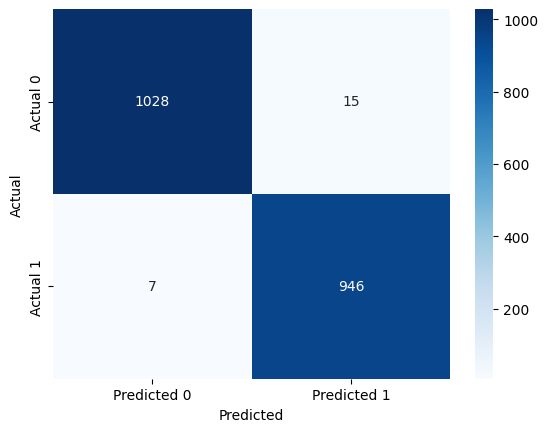

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# kNN with TF-IDF

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [19]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train_vect_tf_idf, y_train)

KNeighborsClassifier(n_neighbors=1)

In [20]:
# Predict on the test set
y_pred = knn_model.predict(X_test_vect_tf_idf)

from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

# Compute metrics for each class
precision_class, recall_class, f1_class, support_class = precision_recall_fscore_support(y_test, y_pred, average=None, labels=[0, 1])

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Extract TP, TN, FP, FN for each class
TP_0 = conf_matrix[0, 0]
FN_0 = conf_matrix[0, 1]
FP_0 = conf_matrix[1, 0]
TN_0 = conf_matrix[1, 1]

TP_1 = conf_matrix[1, 1]
FN_1 = conf_matrix[1, 0]
FP_1 = conf_matrix[0, 1]
TN_1 = conf_matrix[0, 0]

# Calculate overall accuracy
accuracy = (TP_0 + TP_1) / (TP_0 + TP_1 + FP_0 + FP_1 + FN_0 + FN_1)

print(f'Overall Accuracy: {accuracy}')
print(f'Class 0 - Precision: {precision_class[0]}, Recall: {recall_class[0]}, F1-score: {f1_class[0]}, Support: {support_class[0]}')
print(f'Class 1 - Precision: {precision_class[1]}, Recall: {recall_class[1]}, F1-score: {f1_class[1]}, Support: {support_class[1]}')

Overall Accuracy: 0.7861297539149888
Class 0 - Precision: 0.8688073394495412, Recall: 0.9079578139980825, F1-score: 0.8879512423816222, Support: 1043
Class 1 - Precision: 0.8940397350993378, Recall: 0.8499475341028332, F1-score: 0.8714362560516407, Support: 953


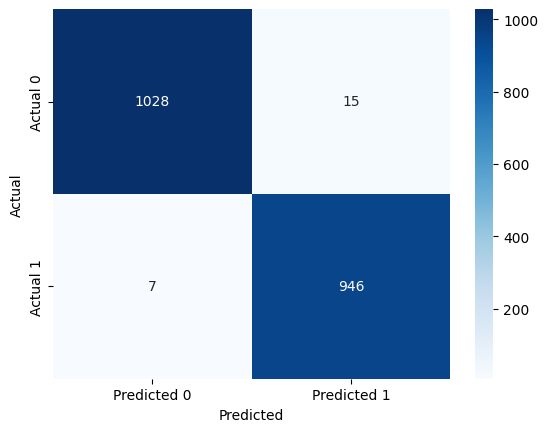

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Decison Tree with TF-IDF

In [21]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model = dt_model.fit(X_train_vect_tf_idf, y_train)

In [22]:
# Predict on the test set
y_pred = dt_model.predict(X_test_vect_tf_idf)

from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

# Compute metrics for each class
precision_class, recall_class, f1_class, support_class = precision_recall_fscore_support(y_test, y_pred, average=None, labels=[0, 1])

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Extract TP, TN, FP, FN for each class
TP_0 = conf_matrix[0, 0]
FN_0 = conf_matrix[0, 1]
FP_0 = conf_matrix[1, 0]
TN_0 = conf_matrix[1, 1]

TP_1 = conf_matrix[1, 1]
FN_1 = conf_matrix[1, 0]
FP_1 = conf_matrix[0, 1]
TN_1 = conf_matrix[0, 0]

# Calculate overall accuracy
accuracy = (TP_0 + TP_1) / (TP_0 + TP_1 + FP_0 + FP_1 + FN_0 + FN_1)

print(f'Overall Accuracy: {accuracy}')
print(f'Class 0 - Precision: {precision_class[0]}, Recall: {recall_class[0]}, F1-score: {f1_class[0]}, Support: {support_class[0]}')
print(f'Class 1 - Precision: {precision_class[1]}, Recall: {recall_class[1]}, F1-score: {f1_class[1]}, Support: {support_class[1]}')

Overall Accuracy: 0.9733069698467622
Class 0 - Precision: 0.98565965583174, Recall: 0.9884947267497604, F1-score: 0.9870751555768311, Support: 1043
Class 1 - Precision: 0.9873684210526316, Recall: 0.9842602308499475, F1-score: 0.9858118759852864, Support: 953


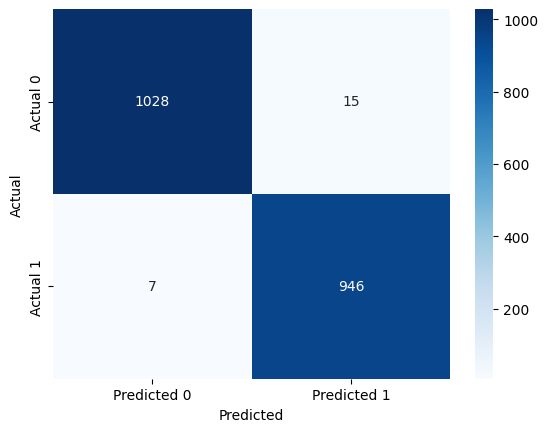

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Logistic Regression with TF-IDF

In [23]:
from sklearn.linear_model import LogisticRegression
lg_model = LogisticRegression(C=5, penalty='l1', solver='liblinear')
lg_model = lg_model.fit(X_train_vect_tf_idf, y_train)

In [24]:
# Predict on the test set
y_pred = lg_model.predict(X_test_vect_tf_idf)

from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

# Compute metrics for each class
precision_class, recall_class, f1_class, support_class = precision_recall_fscore_support(y_test, y_pred, average=None, labels=[0, 1])

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Extract TP, TN, FP, FN for each class
TP_0 = conf_matrix[0, 0]
FN_0 = conf_matrix[0, 1]
FP_0 = conf_matrix[1, 0]
TN_0 = conf_matrix[1, 1]

TP_1 = conf_matrix[1, 1]
FN_1 = conf_matrix[1, 0]
FP_1 = conf_matrix[0, 1]
TN_1 = conf_matrix[0, 0]

# Calculate overall accuracy
accuracy = (TP_0 + TP_1) / (TP_0 + TP_1 + FP_0 + FP_1 + FN_0 + FN_1)

print(f'Overall Accuracy: {accuracy}')
print(f'Class 0 - Precision: {precision_class[0]}, Recall: {recall_class[0]}, F1-score: {f1_class[0]}, Support: {support_class[0]}')
print(f'Class 1 - Precision: {precision_class[1]}, Recall: {recall_class[1]}, F1-score: {f1_class[1]}, Support: {support_class[1]}')

Overall Accuracy: 0.9772164437840515
Class 0 - Precision: 0.9875717017208413, Recall: 0.9904122722914669, F1-score: 0.9889899473432264, Support: 1043
Class 1 - Precision: 0.9894736842105263, Recall: 0.9863588667366212, F1-score: 0.9879138202837625, Support: 953


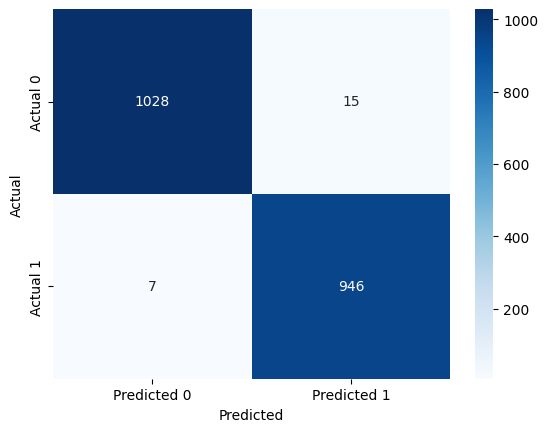

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# SVM with TF-IDF

In [25]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model = svm_model.fit(X_train_vect_tf_idf, y_train)

In [26]:
# Predict on the test set
y_pred = svm_model.predict(X_test_vect_tf_idf)

from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

# Compute metrics for each class
precision_class, recall_class, f1_class, support_class = precision_recall_fscore_support(y_test, y_pred, average=None, labels=[0, 1])

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Extract TP, TN, FP, FN for each class
TP_0 = conf_matrix[0, 0]
FN_0 = conf_matrix[0, 1]
FP_0 = conf_matrix[1, 0]
TN_0 = conf_matrix[1, 1]

TP_1 = conf_matrix[1, 1]
FN_1 = conf_matrix[1, 0]
FP_1 = conf_matrix[0, 1]
TN_1 = conf_matrix[0, 0]

# Calculate overall accuracy
accuracy = (TP_0 + TP_1) / (TP_0 + TP_1 + FP_0 + FP_1 + FN_0 + FN_1)

print(f'Overall Accuracy: {accuracy}')
print(f'Class 0 - Precision: {precision_class[0]}, Recall: {recall_class[0]}, F1-score: {f1_class[0]}, Support: {support_class[0]}')
print(f'Class 1 - Precision: {precision_class[1]}, Recall: {recall_class[1]}, F1-score: {f1_class[1]}, Support: {support_class[1]}')

Overall Accuracy: 0.9781962338949455
Class 0 - Precision: 0.9932367149758454, Recall: 0.9856184084372004, F1-score: 0.9894128970163619, Support: 1043
Class 1 - Precision: 0.9843912591050988, Recall: 0.9926547743966422, F1-score: 0.9885057471264367, Support: 953


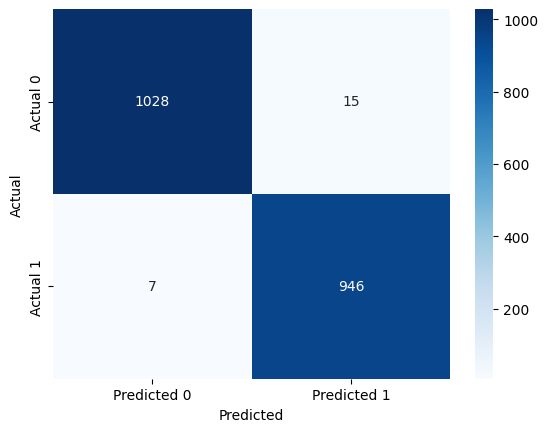

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# GridSearchCV

https://chatgpt.com/share/2d177bbf-aa11-4e78-a40b-04e4504d2933 this is a link with a working example

https://chatgpt.com/share/4200614f-4ded-4cff-8d85-f3d721492adb : this is a link for me to learn about GridSearchCV

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Set up the SVM model with GridSearchCV
svm = SVC()
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001]
}
clf = GridSearchCV(svm, parameters, cv=5, scoring='accuracy')

# Train the model
clf.fit(X_train, y_train)

# Retrieve the best hyperparameters
best_params = clf.best_params_
print("Best Parameters:", best_params)


# Printing Overall Mertics
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='1', average='binary')
recall = recall_score(y_test, y_pred, pos_label='1', average='binary')
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Classification Report:\n", report)